# Домашнее задание 

## по дисциплине «Методы машинного обучения»

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

## Отчет по домашнему заданию
Отчет по домашнему заданию должен содержать:

1. Титульный лист.
2. Постановку задачи машинного обучения.
3. Описание последовательности действий студента по решению задачи машинного обучения.
4. Выводы.

# Текстовое описание набора данных

Используется набор данных, использующий данные химического анализа для установления происхождения вина: https://archive.ics.uci.edu/ml/datasets/Wine

Эти данные являются результатами химического анализа вин, выращенных в одном регионе Италии, но полученных из трех различных сортов. В результате анализа было определено 13 компонентов, содержащихся в каждом из трех видов вин. 

Датасет содержит следующие колонки:
- Алкоголь 
- Яблочная кислота 
- Зола 
- Щелочность золы 
- Магний 
- Всего фенолов 
- Флаваноиды 
- Нефлаваноидные фенолы 
- Проантоцианы 
- Интенсивность цвета 
- Оттенок 
- OD280 / OD315 (разбавленность вина) 
- Пролин 

# Импорт библиотек

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

In [6]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Загрузка данных

In [7]:
from sklearn.datasets import *

In [11]:
wine = load_wine()

In [13]:
train = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [14]:
# Первые 5 строк датасета
train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [15]:
# Размер обучающего датасета - 178 строк, 14 колонок
train.shape

(178, 14)

In [16]:
# Список колонок
train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [17]:
# Список колонок с типами данных 
train.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [18]:
# Проверим наличие пустых значений
train.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### Вывод. Представленный набор данных не содержит пропусков.

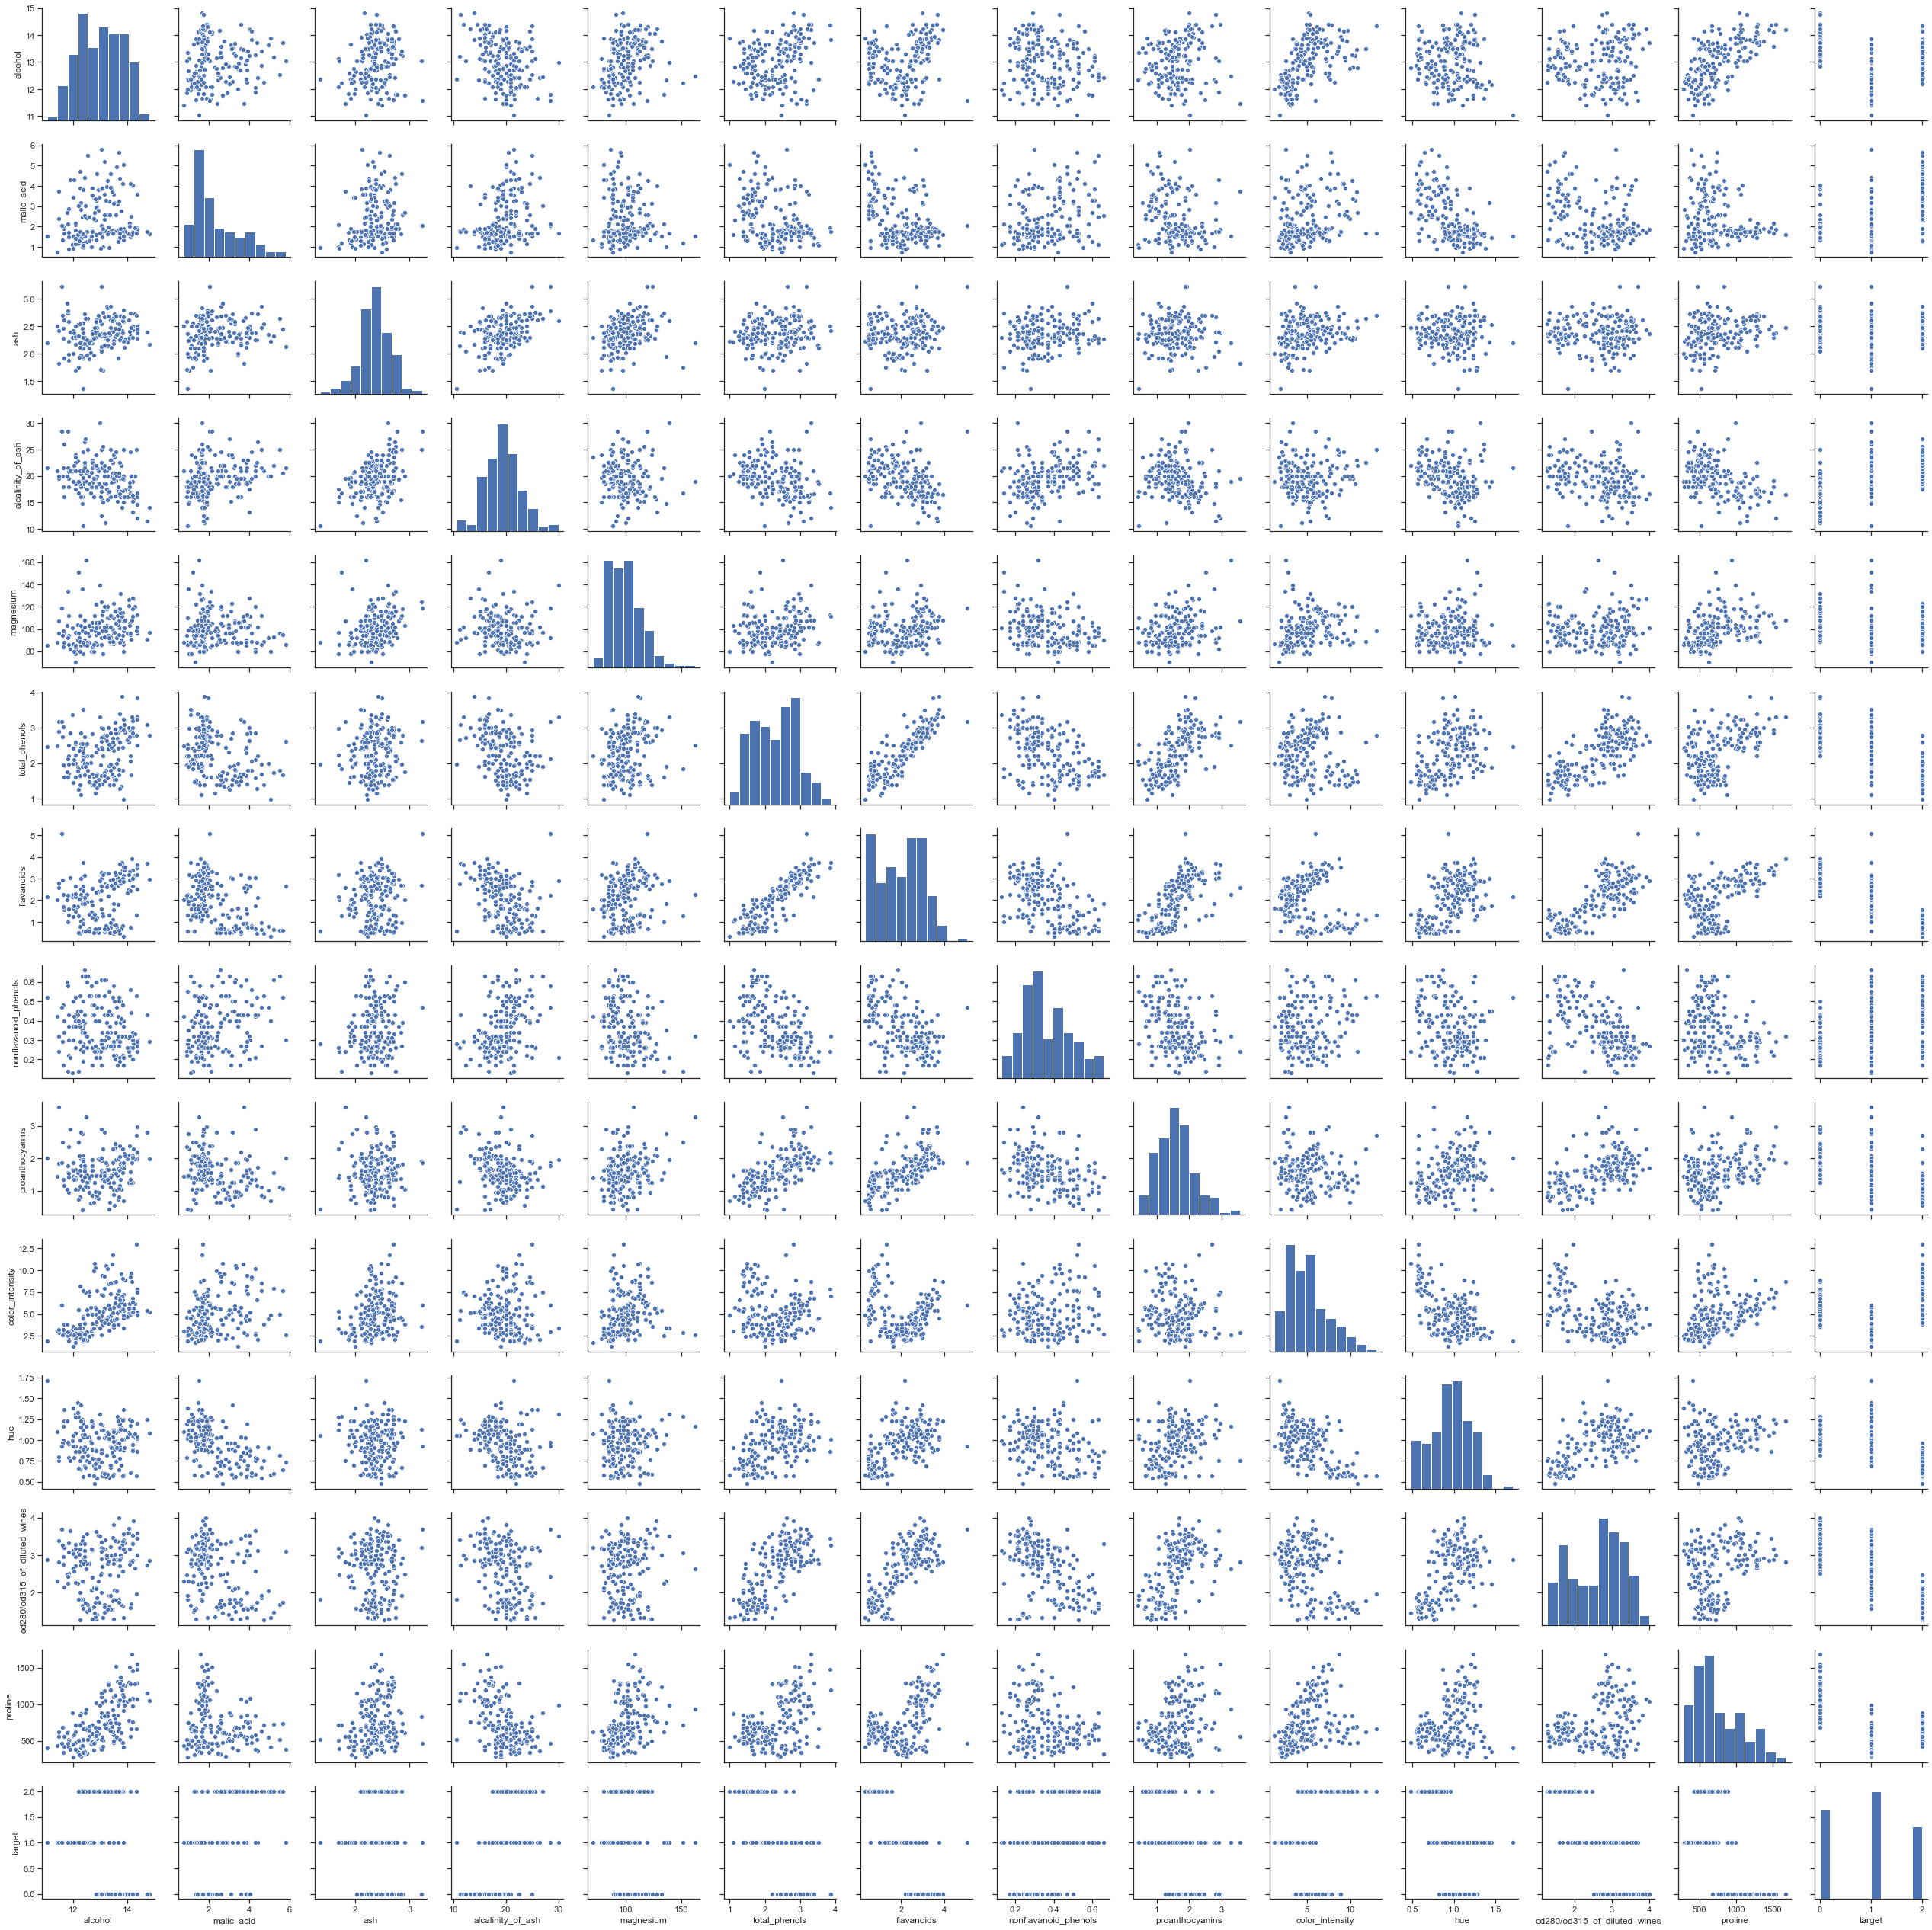

In [19]:
# Парные диаграммы
sns.pairplot(train)

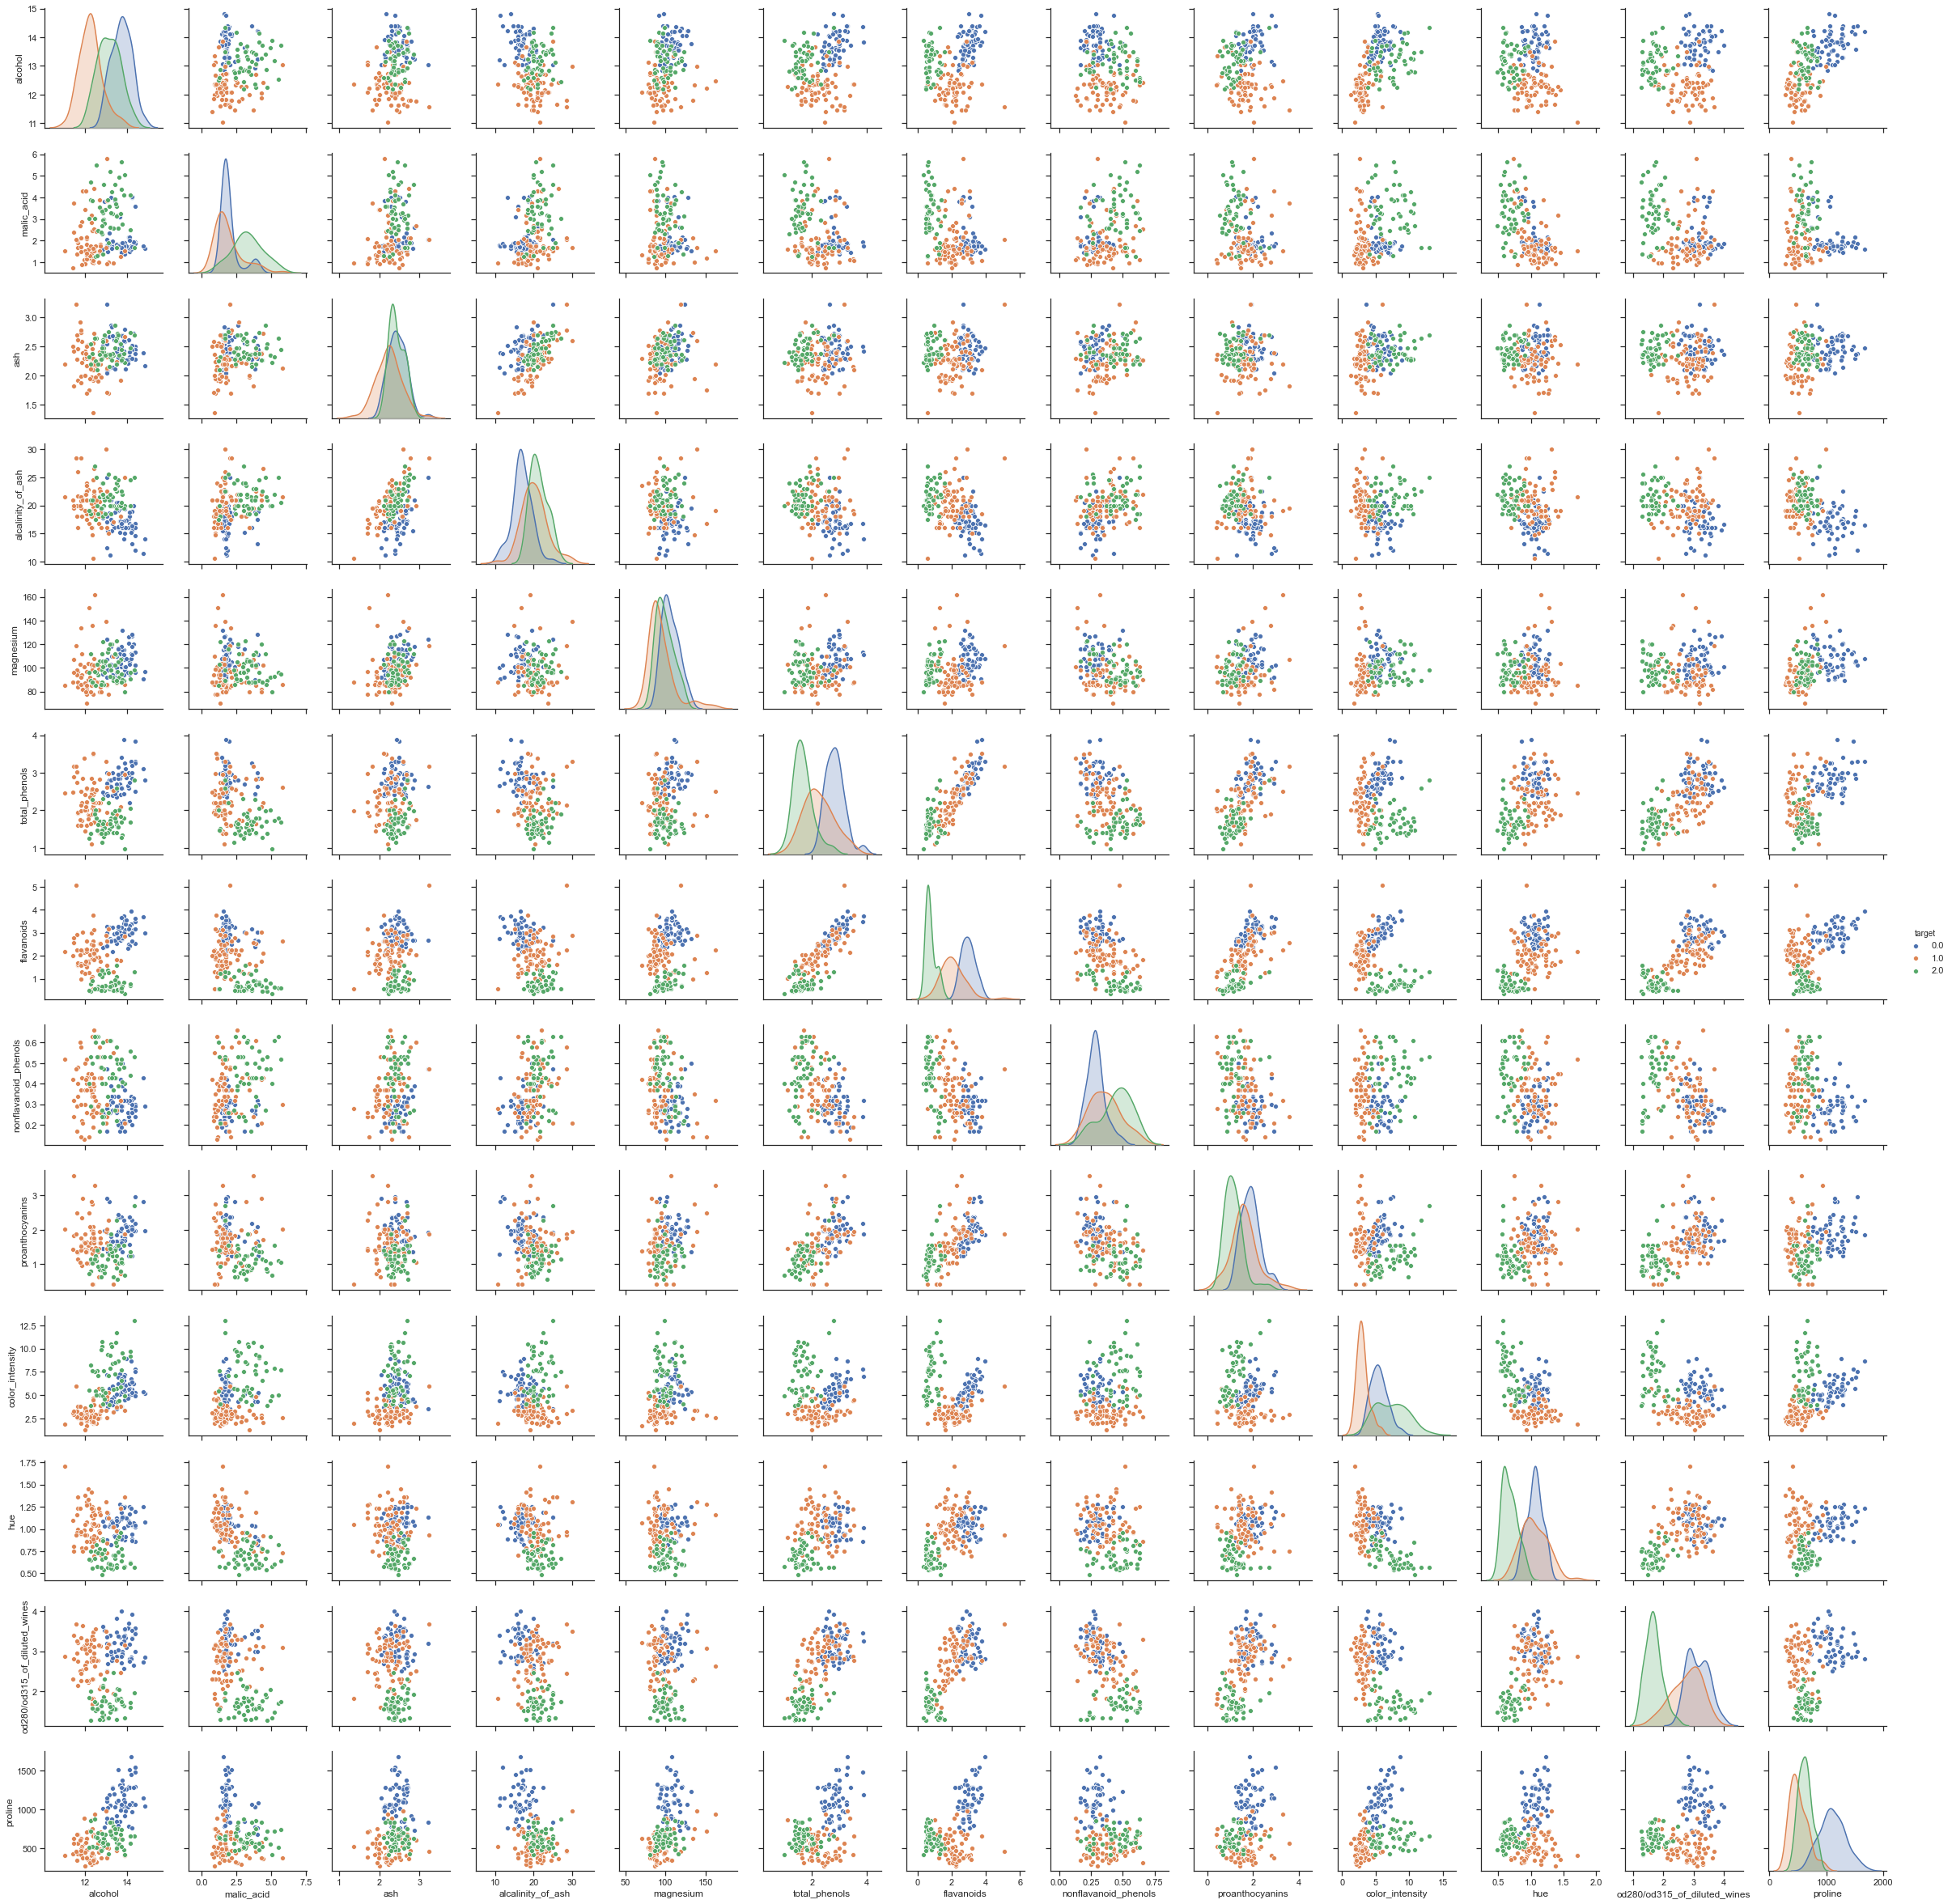

In [20]:
sns.pairplot(train, hue="target")

In [22]:
# Убедимся, что целевой признак
# для задачи классификации содержит только 0, 1 и 2
train['target'].unique()

array([0., 1., 2.])

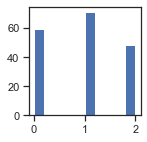

In [23]:
# Оценим дисбаланс классов для target
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['target'])
plt.show()

In [24]:
train['target'].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [27]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1, class_3 = train['target'].value_counts()
print('Класс 0 составляет {}%, класс 1 составляет {}%, класс 2 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100, round(class_3 / total, 4)*100))

Класс 0 составляет 39.89%, класс 1 составляет 33.15%, класс 2 составляет 26.97%.


#### Вывод. Дисбаланс классов практически отсутствует.

In [28]:
train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

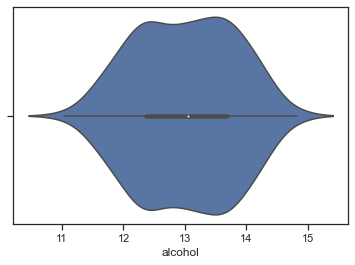

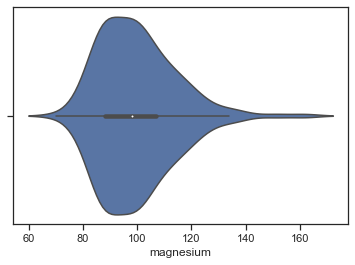

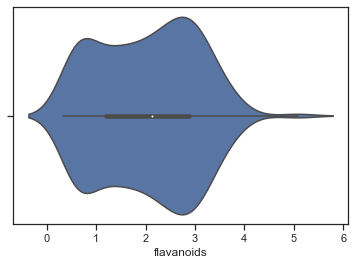

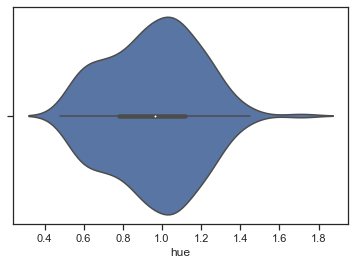

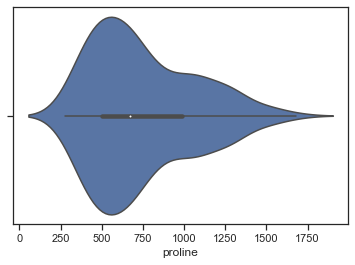

In [29]:
# Скрипичные диаграммы для числовых колонок
for col in ['alcohol', 'magnesium', 'flavanoids', 'hue', 'proline']:
    sns.violinplot(x=train[col])
    plt.show()

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [30]:
train.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Для построения моделей будем использовать все признаки. Категориальные признаки отсутствуют, их кодирования не требуется.

In [32]:
# Числовые колонки для масштабирования
scale_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [34]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [35]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [36]:
train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,alcalinity_of_ash_scaled,magnesium_scaled,total_phenols_scaled,flavanoids_scaled,nonflavanoid_phenols_scaled,proanthocyanins_scaled,color_intensity_scaled,hue_scaled,od280/od315_of_diluted_wines_scaled,proline_scaled
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


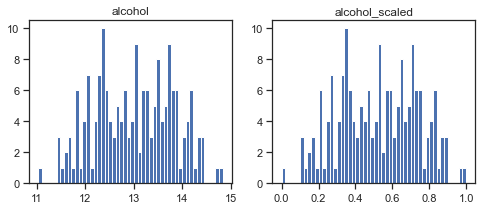

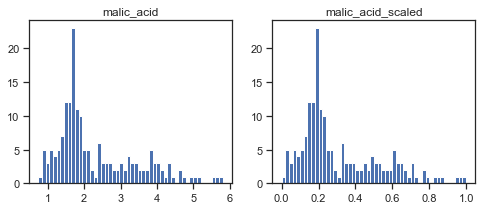

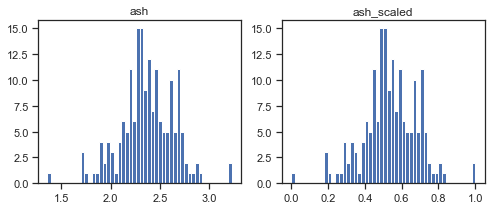

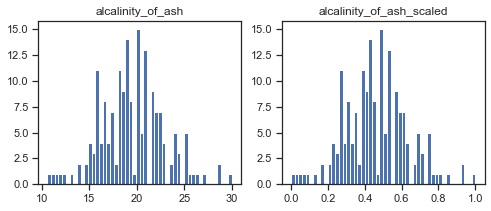

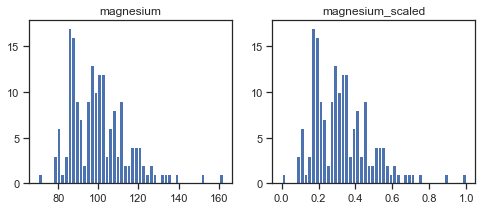

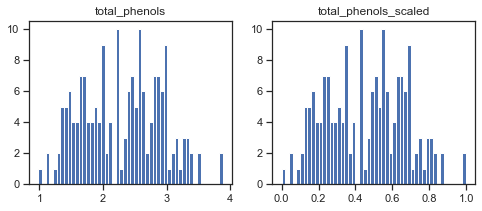

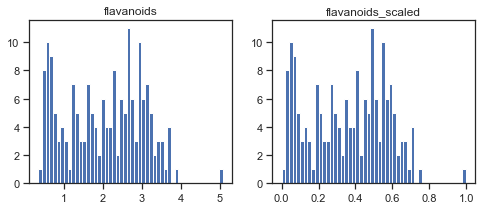

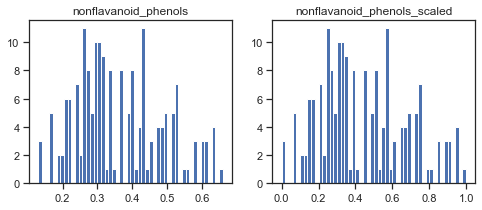

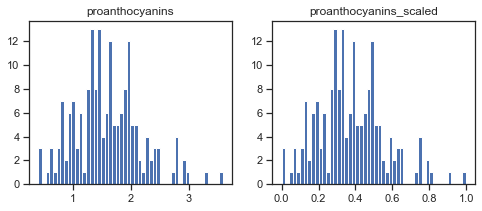

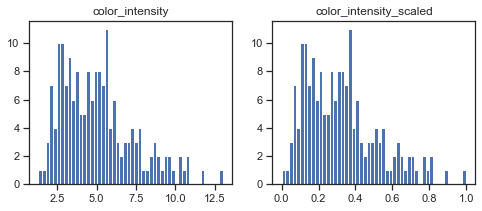

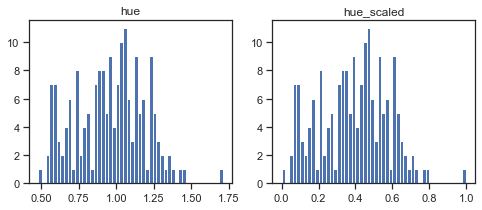

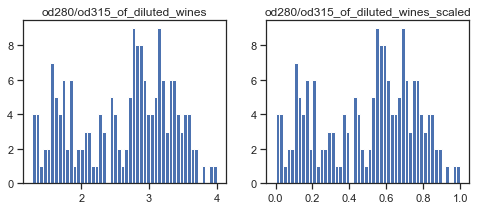

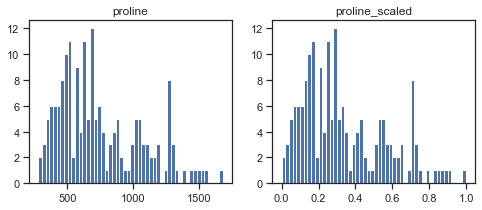

In [37]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [39]:
# Воспользуемся наличием тестовых выборок, 
# включив их в корреляционную матрицу
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [41]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['alcohol_scaled',
 'malic_acid_scaled',
 'ash_scaled',
 'alcalinity_of_ash_scaled',
 'magnesium_scaled',
 'total_phenols_scaled',
 'flavanoids_scaled',
 'nonflavanoid_phenols_scaled',
 'proanthocyanins_scaled',
 'color_intensity_scaled',
 'hue_scaled',
 'od280/od315_of_diluted_wines_scaled',
 'proline_scaled',
 'target']

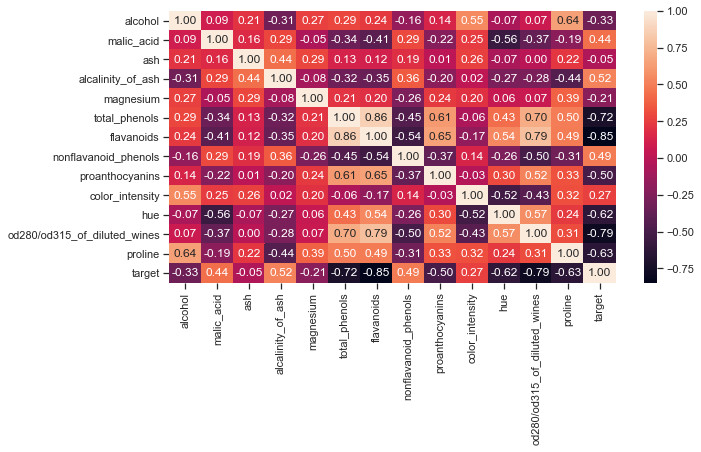

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train[corr_cols_1].corr(), annot=True, fmt='.2f')

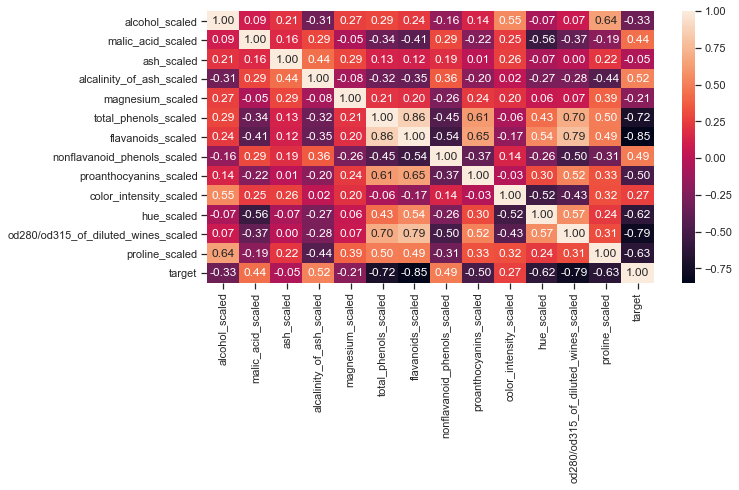

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации "target" наиболее сильно коррелирует с щелочностью золы (0.52), нефлаваноидными фенолами (0.49) и яблочной кислотой (0.44). Эти признаки обязательно следует оставить в модели классификации.
- Целевой признак регрессии "flavanoids" наиболее сильно коррелирует с "total_phenols" (0.86) и OD280 / OD315 (разбавленностью вина) (0.79). Эти признаки обязательно следует оставить в модели регрессии.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

# Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи классификации будем использовать:
Метрики, формируемые на основе матрицы ошибок:

1. Метрика precision:
Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

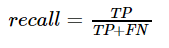

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

2. Метрика recall (полнота):
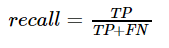

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

### В качестве метрик для решения задачи регрессии будем использовать:
1. Mean absolute error - средняя абсолютная ошибка
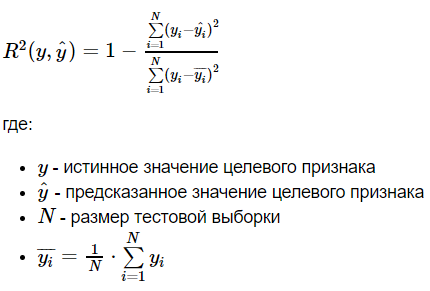

Вычисляется с помощью функции mean_absolute_error.

2. Mean squared error - средняя квадратичная ошибка
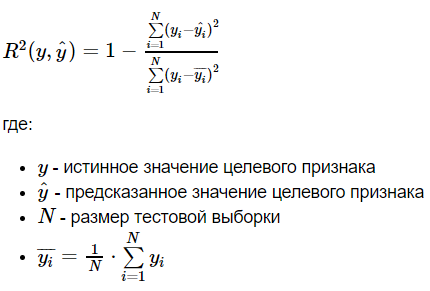

Вычисляется с помощью функции mean_squared_error.

3. Метрика R2 или коэффициент детерминации
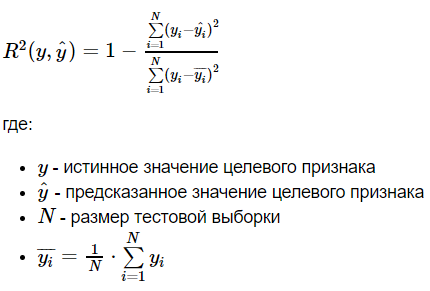

Вычисляется с помощью функции r2_score.

In [44]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show() 

# Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. 

Для задачи классификации будем использовать следующие модели:

- Логистическая регрессия
- Метод ближайших соседей
- Случайный лес

Для задачи регрессии будем использовать следующие модели:

- Машина опорных векторов
- Метод ближайших соседей
- Решающее дерево
- Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [46]:
# Признаки для задачи классификации
task_clas_cols = ['alcalinity_of_ash_scaled', 'nonflavanoid_phenols_scaled', 
                  'malic_acid_scaled', 'color_intensity_scaled']

In [57]:
# Разделение выборки на обучающую и тестовую
clas_X_train, clas_X_test, clas_Y_train, clas_Y_test = train_test_split(
    train[task_clas_cols], train['target'], test_size=0.5, random_state=1)
clas_X_train.shape, clas_X_test.shape, clas_Y_train.shape, clas_Y_test.shape

((89, 4), (89, 4), (89,), (89,))

In [58]:
# Признаки для задачи регресии
task_regr_cols = ['total_phenols_scaled', 'od280/od315_of_diluted_wines_scaled', 
                  'proanthocyanins_scaled', 'proline_scaled']

In [59]:
# Разделение выборки на обучающую и тестовую
regr_X_train, regr_X_test, regr_Y_train, regr_Y_test = train_test_split(
    train[task_regr_cols], train['flavanoids'], test_size=0.5, random_state=1)
regr_X_train.shape, regr_X_test.shape, regr_Y_train.shape, regr_Y_test.shape

((89, 4), (89, 4), (89,), (89,))

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [81]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'RF':RandomForestClassifier()}

In [82]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [184]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    Y_pred = model.predict(clas_X_test)
    precision = precision_score(clas_Y_test.values, Y_pred, average = 'weighted')
    recall = recall_score(clas_Y_test.values, Y_pred, average = 'weighted')
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


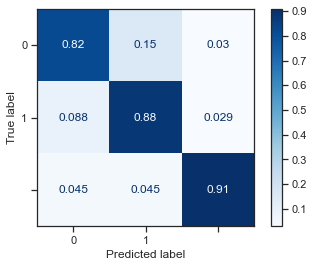

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


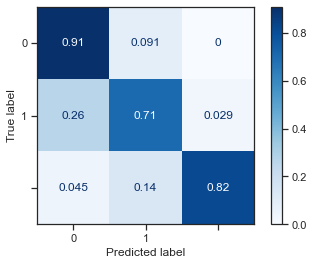

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


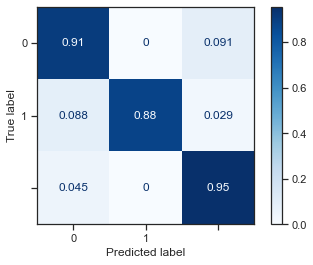

In [185]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Решение задачи регрессии

In [163]:
# Модели
regr_models = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
               'SVR':SVR(),
               'Tree':DecisionTreeRegressor(),
               'GB':GradientBoostingRegressor()}

In [164]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [165]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(regr_X_train, regr_Y_train)
    Y_pred = model.predict(regr_X_test)
    
    mae = mean_absolute_error(regr_Y_test, Y_pred)
    mse = mean_squared_error(regr_Y_test, Y_pred)
    r2 = r2_score(regr_Y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

In [166]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=0.261, MSE=0.112, R2=0.888
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=0.249, MSE=0.112, R2=0.887
*****************************************************
*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='dep

# Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

### Для задачи классификации

In [167]:
clas_X_train.shape

(89, 4)

In [168]:
n_range = np.array(range(1,70,10))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61])}]

In [169]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf_gs.fit(clas_X_train, clas_Y_train)

Wall time: 252 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [170]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [171]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1}

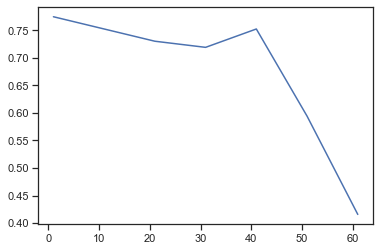

In [172]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Для задачи регрессии

In [173]:
n_range = np.array(range(1,70,10))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61])}]

In [174]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(regr_X_train, regr_Y_train)

Wall time: 208 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1, 11, 21, 31, 41, 51, 61])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [175]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [176]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 11}

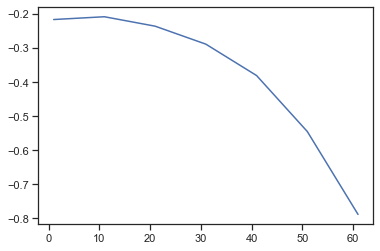

In [177]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

# Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [186]:
clas_models_grid = {'KNN_1':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
*****************************************************


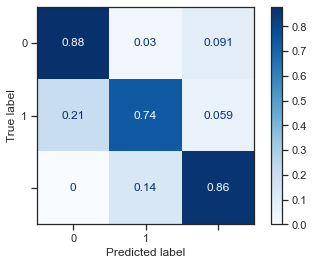

In [187]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Решение задачи регрессии

In [188]:
regr_models_grid = {'KNN_11':regr_gs.best_estimator_}

In [181]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

MAE=0.267, MSE=0.116, R2=0.884
*****************************************************


# Формирование выводов о качестве построенных моделей на основе выбранных метрик.

### Решение задачи классификации

In [189]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall'], dtype=object)

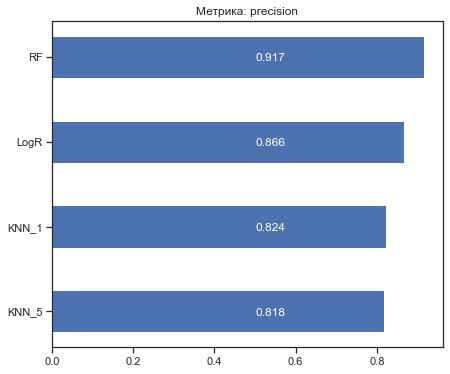

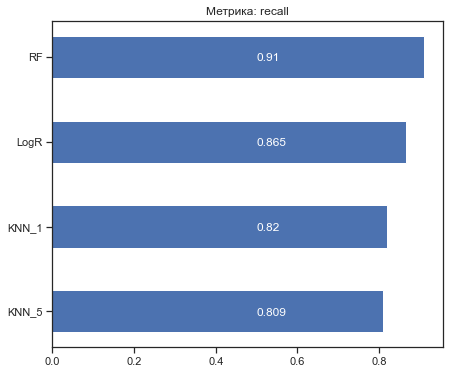

In [190]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

##### Вывод: на основании двух метрик из двух используемых, лучшей оказалась модель "случайный лес".

### Решение задачи классификации

In [191]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

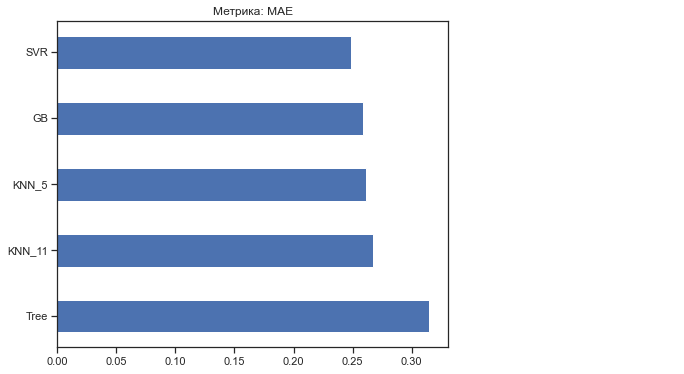

In [192]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

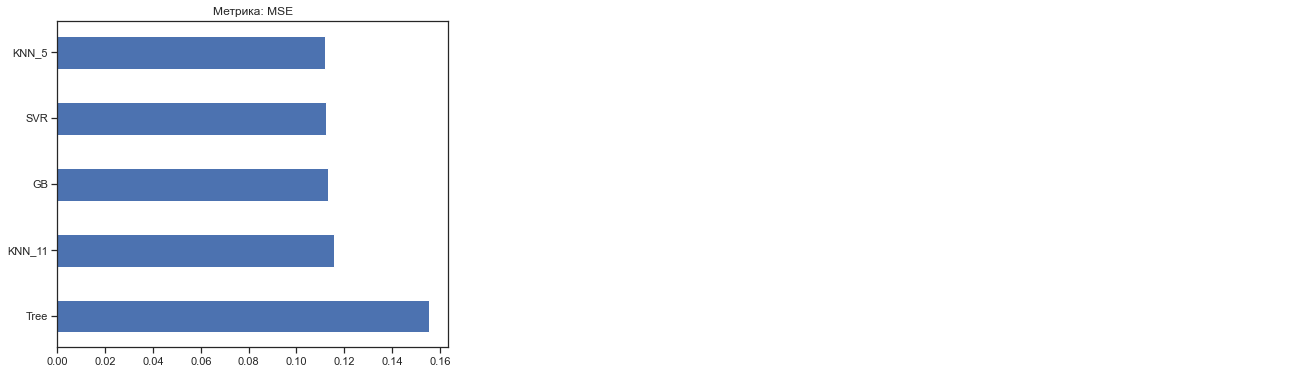

In [193]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

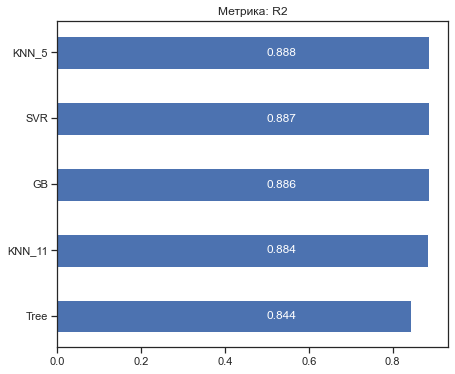

In [194]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

##### Вывод: на основании двух метрик из трех используемых, лучшей оказалась модель 5 ближайших соседей.